<a href="https://colab.research.google.com/github/lakshh670/100_days_of_DeepLearning/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In this notebook we will implement regularization. It is used to reduce the overfitting of the model. It is mainly of two types: L1 and L2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from matplotlib import pyplot as pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# Data Generation

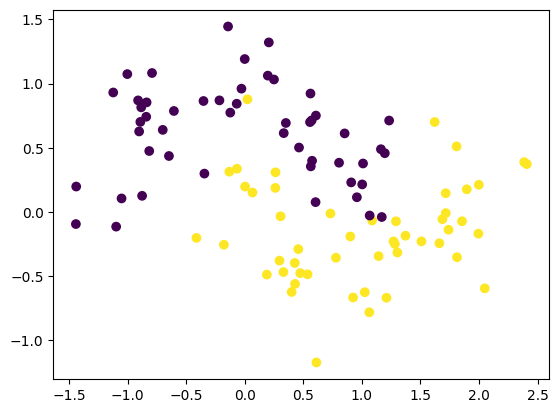

In [12]:
x,y=make_moons(noise=0.25,random_state=1)
plt.scatter(x[:,0],x[:,1],c=y)


In [15]:
# Let's make a model without adding regularisation.
model=Sequential()
model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['Accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
history=model.fit(x,y,epochs=2000,validation_split=0.2,verbose=True)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - Accuracy: 1.0000 - loss: 2.2457e-06 - val_Accuracy: 0.9000 - val_loss: 0.8416
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - Accuracy: 1.0000 - loss: 2.9126e-06 - val_Accuracy: 0.9000 - val_loss: 0.8449
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - Accuracy: 1.0000 - loss: 2.3490e-06 - val_Accuracy: 0.9000 - val_loss: 0.8465
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - Accuracy: 1.0000 - loss: 2.6084e-06 - val_Accuracy: 0.9000 - val_loss: 0.8471
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - Accuracy: 1.0000 - loss: 2.1546e-06 - val_Accuracy: 0.9000 - val_loss: 0.8464
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - Accuracy: 1.0000 - loss: 2.0496e-06 - val_Accuracy: 0.9000 - val_loss: 0.8455
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - Accuracy: 1.0000 - loss: 3.2679e-06 - val_Accuracy: 0.9000 - val_loss: 0.8456
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - Accuracy: 1.0000 - loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


<Axes: >

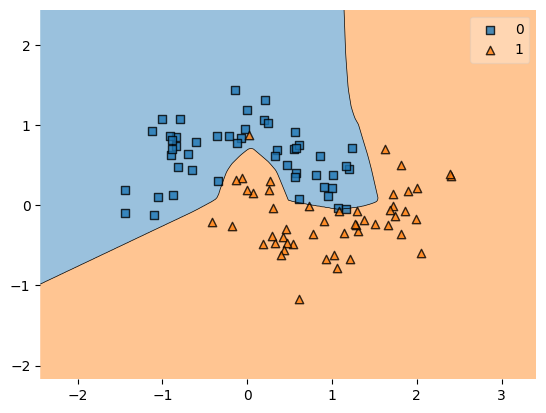

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y,clf=model)

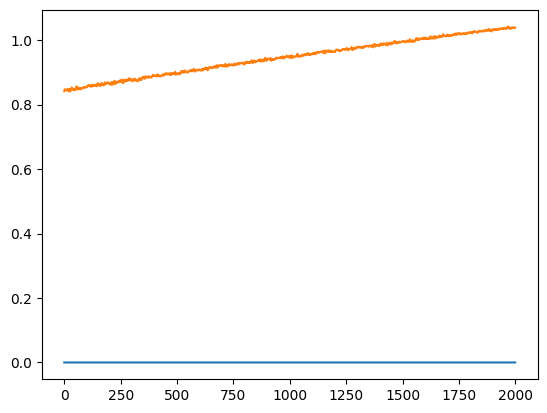

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [25]:
# Now, let's add regularization to the model
model2=Sequential()
model2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.01)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.01)))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['Accuracy'])


In [26]:
history=model2.fit(x,y,epochs=2000,validation_split=0.2,verbose=0)